Imports

In [1]:
import pandas as pd        # Used for data manipulation and analysis
import numpy as np         # Provides support for numerical operations
import matplotlib.pyplot as plt  # Used for creating static visualizations
import seaborn as sns      # High-level interface for attractive statistical graphics


Load the Data

In [2]:
df = pd.read_csv('customer_behavior_unsupervised.csv')  # Load the dataset from a CSV file
df.head()  # Display the first 5 rows to preview the data


,feature_0,feature_1,feature_2,feature_3,feature_4
0,-1.248325,-1.137174,0.277968,0.702952,1.374166
1,-1.241003,0.720804,0.944749,-1.672147,-0.695038
2,-0.859728,0.955295,0.742522,-1.416056,-0.820891
3,-0.546781,1.198398,0.489929,-1.692133,-0.573161
4,1.091959,0.905112,0.064361,1.088081,-0.892193


Exploratory Data Analysis - EDA

In [3]:
df.shape  # Returns a tuple showing (number of rows, number of columns) in the dataset


(500, 5)

In [4]:
df.info()  # Displays info about the dataset: column names, non-null counts, and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  500 non-null    float64
 1   feature_1  500 non-null    float64
 2   feature_2  500 non-null    float64
 3   feature_3  500 non-null    float64
 4   feature_4  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [5]:
df.describe()  # Shows summary statistics for each numeric feature (mean, std, min, quartiles, max)


,feature_0,feature_1,feature_2,feature_3,feature_4
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,-2.344791e-16,-1.314504e-16,5.684342e-16,-1.882938e-16,-2.877698e-16
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-2.268404e+00,-1.582220e+00,-2.404161e+00,-2.370457e+00,-1.269599e+00
25%,-7.000235e-01,-9.278037e-01,-7.185726e-01,-8.836220e-01,-7.241618e-01
50%,-1.225416e-01,1.318703e-01,2.734487e-01,2.918948e-01,-4.097401e-01
75%,6.630546e-01,9.653978e-01,7.739601e-01,8.173842e-01,6.277492e-01
max,2.161047e+00,1.260191e+00,1.783935e+00,1.947826e+00,2.191764e+00


In [6]:
df.isnull().sum()  # Checks for missing values in each column


feature_0    0
feature_1    0
feature_2    0
feature_3    0
feature_4    0
dtype: int64

In [7]:
df.duplicated().sum()  # Counts the number of duplicate rows in the dataset


0

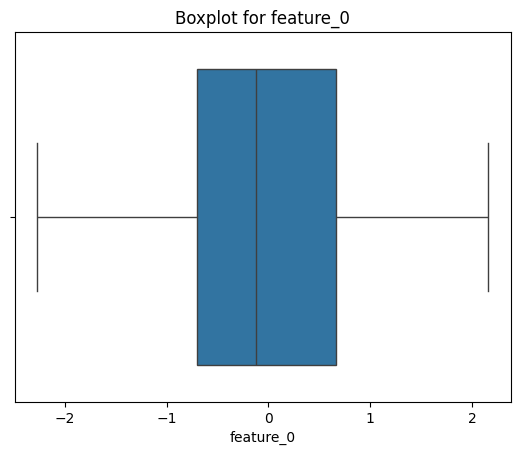

In [8]:
sns.boxplot(x=df['feature_0'])  # Creates a boxplot to visualize the distribution of 'feature_0'
plt.title('Boxplot for feature_0')  # Adds a title to the plot
plt.show()  # Displays the plot


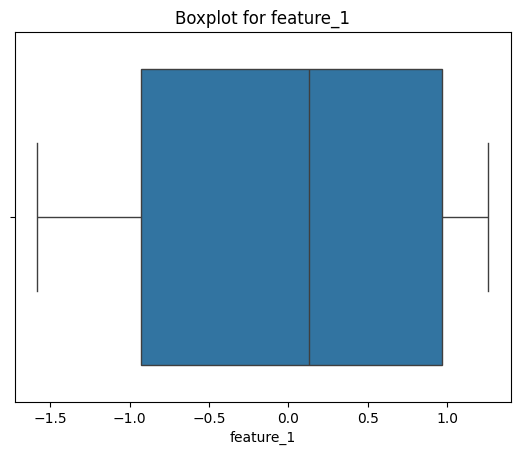

In [9]:
sns.boxplot(x=df['feature_1'])  # Creates a boxplot to visualize the distribution of 'feature_1'
plt.title('Boxplot for feature_1')  # Adds a title to the plot
plt.show()  # Displays the plot


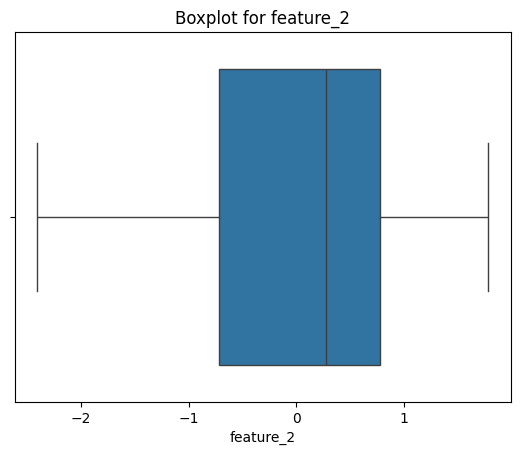

In [10]:
sns.boxplot(x=df['feature_2'])  # Creates a boxplot to visualize the distribution of 'feature_2'
plt.title('Boxplot for feature_2')  # Adds a title to the plot
plt.show()  # Displays the plot


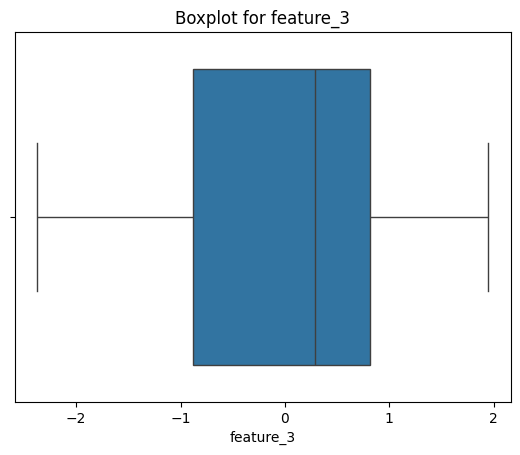

In [11]:
sns.boxplot(x=df['feature_3'])  # Creates a boxplot to visualize the distribution of 'feature_3'
plt.title('Boxplot for feature_3')  # Adds a title to the plot
plt.show()  # Displays the plot


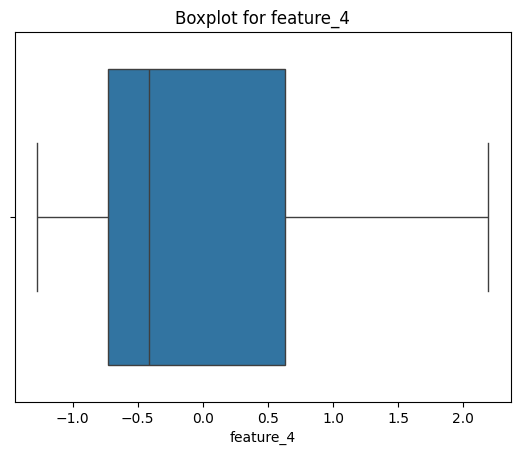

In [12]:
sns.boxplot(x=df['feature_4'])  # Creates a boxplot to visualize the distribution of 'feature_4'
plt.title('Boxplot for feature_4')  # Adds a title to the plot
plt.show()  # Displays the plot


 The data is already clean, with no outliers or issues.
 Let's proceed to the next phase of the analysis.

 Exploratory Analysis - Visuals

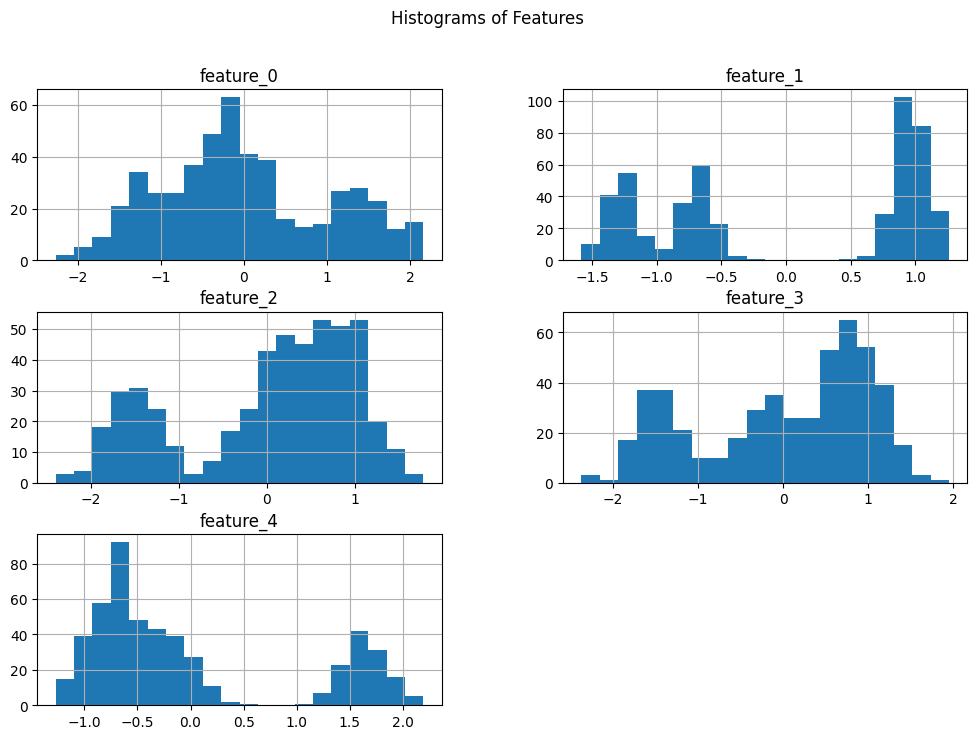

In [13]:
df.hist(bins=20, figsize=(12, 8))  # Plots histograms for all features with 20 bins
plt.suptitle('Histograms of Features')  # Adds a title to the histogram plot
plt.show()  # Displays the plot


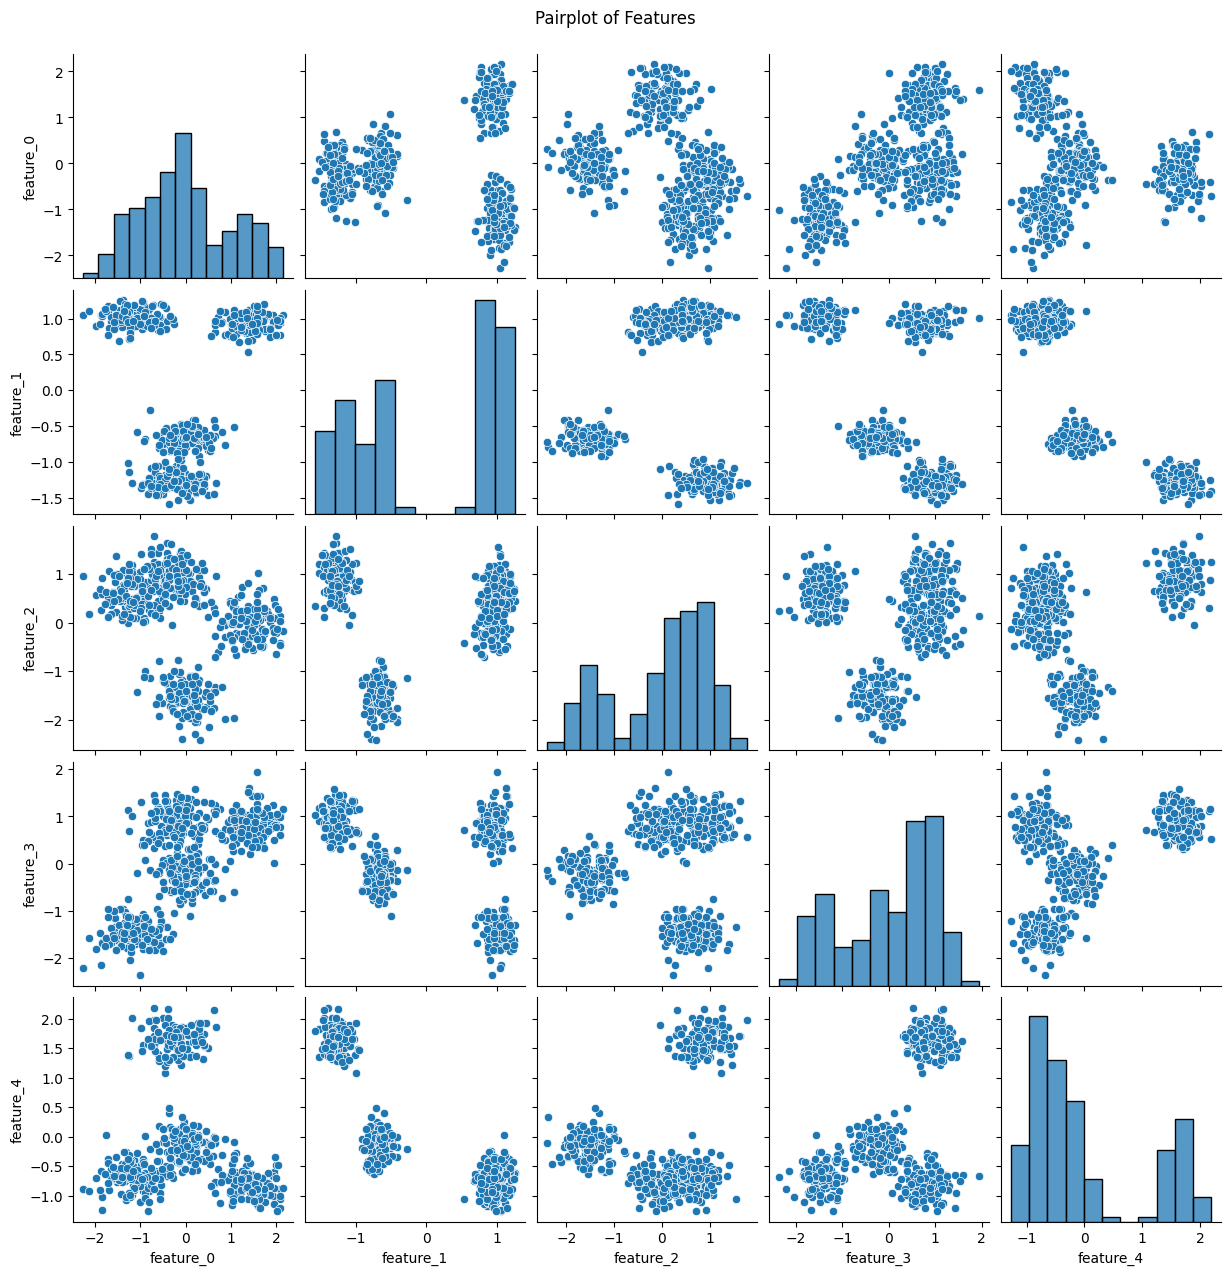

In [14]:
sns.pairplot(df)  # Creates pairplot for all features to visualize the relationships between each pair of features
plt.suptitle('Pairplot of Features', y=1.02)  # Adds a title to the pairplot and adjusts its position
plt.show()  # Displays the plot


Model Building

In [15]:
from sklearn.cluster import KMeans  # Import KMeans clustering algorithm from scikit-learn

# Step 1: Create a KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5)

# Step 2: Fit the KMeans model to the data
kmeans.fit(df)

# Step 3: Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_  # The cluster labels assigned to each row will be added as a new column in the dataframe


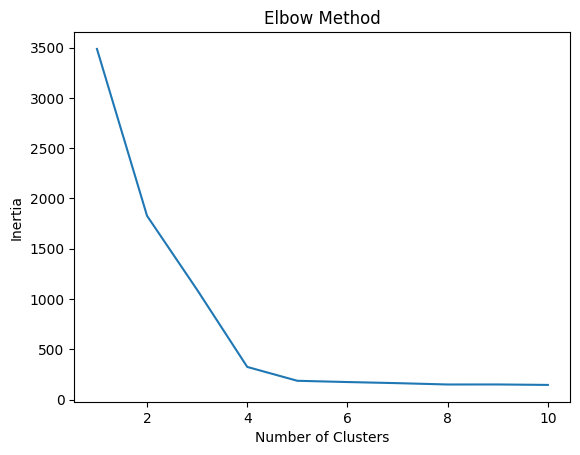

In [16]:
# (Elbow Method)
inertia = []  # Create an empty list to store the inertia values for each k

# Loop through values of k from 1 to 10 (number of clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)  # Create a KMeans model with k clusters
    kmeans.fit(df)  # Fit the model to the data
    inertia.append(kmeans.inertia_)  # Append the inertia value to the list

# Plot the inertia values to visualize the elbow method
plt.plot(range(1, 11), inertia)  # Plot inertia vs. number of clusters
plt.title('Elbow Method')  # Set the title of the plot
plt.xlabel('Number of Clusters')  # Label for x-axis
plt.ylabel('Inertia')  # Label for y-axis
plt.show()  # Display the plot


In [17]:
df.groupby('Cluster').mean()  # Group the data by 'Cluster' column and calculate the mean of each feature for each cluster


,feature_0,feature_1,feature_2,feature_3,feature_4
Cluster,,,,,
0,-0.241412,-1.269505,0.903866,0.890664,1.640135
1,-0.003365,-0.670061,-1.529995,-0.209241,-0.155391
2,-0.835316,1.020057,0.706673,-1.436873,-0.714188
3,1.412126,0.931691,-0.011336,0.795036,-0.803557
4,-1.464166,0.996984,0.575596,-1.511848,-0.651686


In [18]:
from sklearn.ensemble import RandomForestClassifier  # Import the Random Forest Classifier from sklearn
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting the data into training and testing sets
from sklearn.metrics import classification_report  # Import classification_report to evaluate the model's performance

# Define the features (X) and the target (y)
X = df.drop(columns=['Cluster'])  # Drop the 'Cluster' column from the dataframe to use the other features for training
y = df['Cluster']  # The target variable is the 'Cluster' column, which contains the cluster labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
# This splits the dataset into 80% for training and 20% for testing, with a fixed random state for reproducibility

# Create and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Create a Random Forest model with 100 trees
clf.fit(X_train, y_train)  # Train the model on the training data

# Make predictions on the test data
y_pred = clf.predict(X_test)  # Use the trained model to predict the cluster labels for the test set

# Evaluate the model's performance using a classification report
print(classification_report(y_test, y_pred))  # Output the classification report which shows precision, recall, and F1-score for each cluster


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        29
           2       0.86      0.92      0.89        13
           3       1.00      1.00      1.00        23
           4       0.94      0.89      0.91        18

    accuracy                           0.97       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.97      0.97      0.97       100



In [19]:
def predict_cluster(new_user_data):
    # Predict the cluster of the new user based on the trained RandomForest model
    return clf.predict(new_user_data)  # Predict the cluster (label) for the new user data


In [20]:

# Add a new column 'user_spending' to the DataFrame 'df'
# The values are randomly generated from a normal distribution with a mean of 1000 and a standard deviation of 250
# The number of generated values is equal to the number of rows in the DataFrame

df['user_spending'] = np.random.normal(1000, 250, df.shape[0]) 


In [21]:
# Import necessary libraries for Linear Regression and metrics evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features (X) by dropping the 'user_spending' column and set it as the independent variable
# 'y' is the target variable, which is 'user_spending'
X = df.drop(columns=['user_spending'])
y = df['user_spending']

# Split the data into training and test sets, with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Predict the target variable (user spending) on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model performance using R² score and RMSE
# R² score indicates how well the model fits the data (higher is better, close to 1)
print(f'R² Score: {r2_score(y_test, y_pred)}')

# RMSE (Root Mean Squared Error) indicates the error in prediction (lower is better)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')


R² Score: 0.013348808077753627
RMSE: 249.22708261185022


Visualization & Reporting

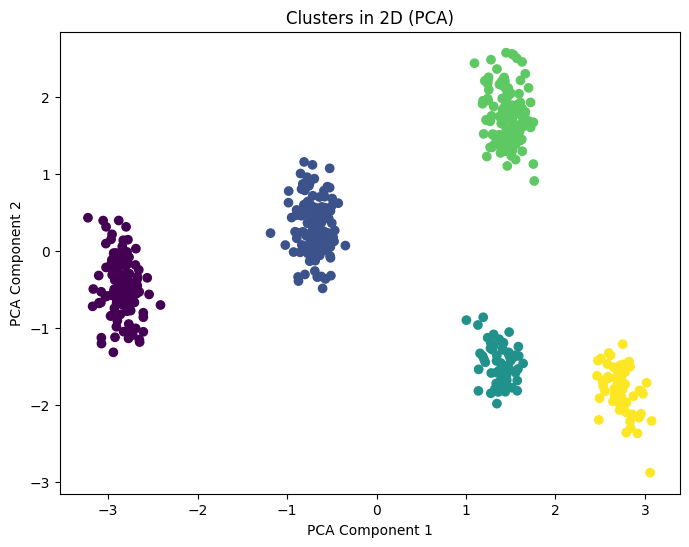

In [22]:
# Import PCA (Principal Component Analysis) for dimensionality reduction
from sklearn.decomposition import PCA

# Initialize PCA to reduce the data to 2 components (for 2D visualization)
pca = PCA(n_components=2)

# Fit the PCA model and transform the data (X) into two principal components
pca_components = pca.fit_transform(X)

# Create a scatter plot to visualize the clusters in 2D
# The points will be colored based on the cluster labels
plt.figure(figsize=(8, 6))

# Scatter plot the first and second PCA components
# Color points by their cluster label (using 'c=df['Cluster']')
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis')

# Add title and labels to the plot
plt.title('Clusters in 2D (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Display the plot
plt.show()


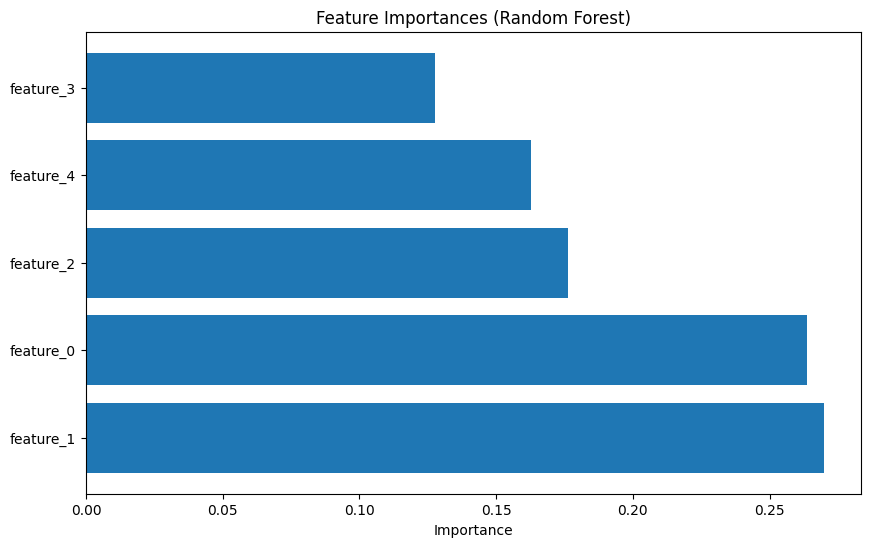

In [23]:
# Assuming clf is the already trained RandomForestClassifier model
importances = clf.feature_importances_  # Get the feature importances from the trained model

# Extract feature names (you can get them from the DataFrame if you have them)
features = X.columns  # Feature names (column names from the input DataFrame)

# Sort the feature importances in descending order
importances_sorted = np.sort(importances)[::-1]  # Sort importances in descending order

# Sort the feature names according to the sorted importances
features_sorted = features[np.argsort(importances)[::-1]]  # Sort feature names based on the sorted importances

# Create a horizontal bar plot to display feature importances
plt.figure(figsize=(10, 6))

# Bar plot with feature names on the y-axis and their corresponding importance on the x-axis
plt.barh(features_sorted, importances_sorted)

# Add a title to the plot
plt.title('Feature Importances (Random Forest)')

# Label the x-axis as 'Importance'
plt.xlabel('Importance')

# Display the plot
plt.show()


Bonus Challenge

In [24]:
import streamlit as st  # Import the Streamlit library for creating web applications
import pandas as pd  # Import pandas for data manipulation
import numpy as np  # Import numpy for numerical operations
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier for clustering
from sklearn.linear_model import LinearRegression  # Import LinearRegression for prediction

# Title of the web app
st.title("Clustering and Prediction App")

# Description of the app
st.write("Enter the user data to predict the cluster and spending.")

# Input fields for the user to enter values for each feature (features 0 to 4)
feature_0 = st.number_input('Feature 0', min_value=-10.0, max_value=10.0, value=0.0)
feature_1 = st.number_input('Feature 1', min_value=-10.0, max_value=10.0, value=0.0)
feature_2 = st.number_input('Feature 2', min_value=-10.0, max_value=10.0, value=0.0)
feature_3 = st.number_input('Feature 3', min_value=-10.0, max_value=10.0, value=0.0)
feature_4 = st.number_input('Feature 4', min_value=-10.0, max_value=10.0, value=0.0)

# Prepare the user input data in a NumPy array and then convert it to a DataFrame
input_data = np.array([[feature_0, feature_1, feature_2, feature_3, feature_4]])
input_df = pd.DataFrame(input_data, columns=['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4'])

# Generate a random cluster prediction (replace with model prediction in real app)
cluster_prediction = np.random.choice([0, 1, 2, 3, 4])

# Generate a random spending prediction (replace with model prediction in real app)
spending_prediction = np.random.normal(1000, 250)

# Display the predicted cluster and spending
st.write(f"The predicted cluster is: {cluster_prediction}")
st.write(f"The predicted user spending is: {spending_prediction:.2f}")

# Descriptions for each cluster to explain what each cluster represents
cluster_descriptions = {
    0: "Cluster 0: Users with low spending and low activity.",
    1: "Cluster 1: Users with high spending and high activity.",
    2: "Cluster 2: Users with medium spending but consistent activity.",
    3: "Cluster 3: Users with low spending but high engagement.",
    4: "Cluster 4: Users with varied spending and sporadic activity."
}

# Display the description of the predicted cluster
st.write(f"Cluster description: {cluster_descriptions.get(cluster_prediction, 'No description available.')}")


2025-05-13 18:44:45.808 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 18:44:47.490 
  command:

    streamlit run c:\ProgramData\Anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-13 18:44:47.492 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 18:44:47.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 18:44:47.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 18:44:47.500 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 18:44:47.504 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 18:44:47.507 Thread 'MainThread': mi

In [25]:
#streamlit run app.py
